In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
X = dataset.iloc[:, 3:5].values

In [8]:
from sklearn.cluster import OPTICS
OP = OPTICS(min_samples=5, xi = 0.05, min_cluster_size = 0.05).fit(X)
y_OP = OP.fit_predict(X)

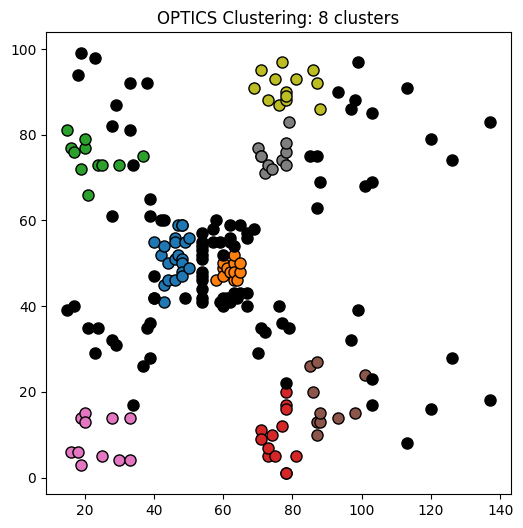

In [9]:
OP = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
y_OP = OP.fit_predict(X)

# Extract labels
labels = OP.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Plot
plt.figure(figsize=(6,6))
unique_labels = set(labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)

    if k == -1:
        # Noise shown in black
        col = [0, 0, 0, 1]

    xy = X[class_member_mask]
    plt.plot(
        xy[:, 0], xy[:, 1], 'o',
        markerfacecolor=tuple(col),
        markeredgecolor='k',
        markersize=8
    )

plt.title(f"OPTICS Clustering: {n_clusters} clusters")
plt.show()